# Submission Stefen Angga
# Rock-Paper-Scissors

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import zipfile,os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip


--2021-06-29 13:45:46--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.25MB/s    in 50s     

2021-06-29 13:46:36 (6.20 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [4]:
class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nStop training, Akurasi di atas 96%")
      self.model.stop_training = True

callbacks = callback()

## DATA AUGMENTATION

In [5]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split= 0.4)

train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        shuffle= True,
        class_mode= 'categorical',
        subset= 'training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        shuffle= True,
        class_mode= 'categorical',
        subset= 'validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [6]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

## CNN Model

In [7]:
model = keras.models.Sequential([
    keras.layers.AveragePooling2D(6, 3, input_shape=(150,150,3)),
    keras.layers.Conv2D(16, 3, activation='relu'),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=40,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=20,
      verbose=2,
      callbacks=[callbacks])

print(model.summary())
model.save("model.h5")

Epoch 1/20
40/40 - 15s - loss: 0.9819 - accuracy: 0.5248 - val_loss: 0.7377 - val_accuracy: 0.7078
Epoch 2/20
40/40 - 12s - loss: 0.5927 - accuracy: 0.7568 - val_loss: 0.3751 - val_accuracy: 0.8781
Epoch 3/20
40/40 - 12s - loss: 0.4169 - accuracy: 0.8461 - val_loss: 0.3144 - val_accuracy: 0.8813
Epoch 4/20
40/40 - 12s - loss: 0.3389 - accuracy: 0.8648 - val_loss: 0.2641 - val_accuracy: 0.9187
Epoch 5/20
40/40 - 12s - loss: 0.3466 - accuracy: 0.8688 - val_loss: 0.1934 - val_accuracy: 0.9375
Epoch 6/20
40/40 - 11s - loss: 0.2598 - accuracy: 0.9000 - val_loss: 0.1672 - val_accuracy: 0.9500
Epoch 7/20
40/40 - 12s - loss: 0.2121 - accuracy: 0.9272 - val_loss: 0.1676 - val_accuracy: 0.9516
Epoch 8/20
40/40 - 12s - loss: 0.2228 - accuracy: 0.9200 - val_loss: 0.1513 - val_accuracy: 0.9500
Epoch 9/20
40/40 - 12s - loss: 0.1782 - accuracy: 0.9359 - val_loss: 0.1276 - val_accuracy: 0.9578
Epoch 10/20
40/40 - 11s - loss: 0.1539 - accuracy: 0.9472 - val_loss: 0.1070 - val_accuracy: 0.9734
Epoch 11/

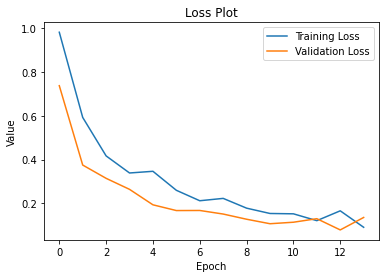

In [8]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

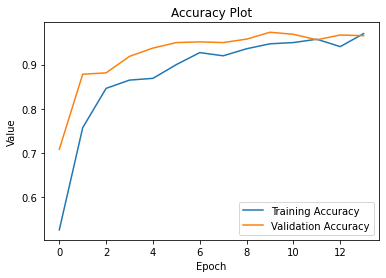

In [9]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

## Predict Image

Saving kertas.JPG to kertas (1).JPG
kertas.JPG
Paper


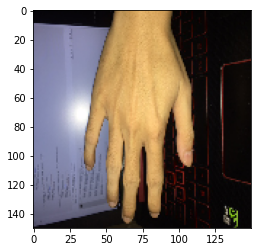

In [10]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('Scissors')

In [12]:
model.evaluate(validation_generator)

28/28 [==============================] - 5s 193ms/step - loss: 0.1249 - accuracy: 0.9645


[0.12489765137434006, 0.964530885219574]